# Sentiment based on tweet frequency

Outputs overall sentiment (with rounded polarity) and sentiment over time (frequency bins).
Also has function for computing overall average sentiment.
TODO: convert to script

There are 407,489 tweets that need to be split up

In [1]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/sentiment/cleaned_tweets_for_sentiment.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b..."
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...


# Clean data

In [3]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [4]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet


In [5]:
df.dtypes

created_at       object
id                int64
cleaned_tweet    object
dtype: object

# Sentiment: apply polarity score

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,"{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,"{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...","{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp..."
...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,"{'neg': 0.153, 'neu': 0.589, 'pos': 0.258, 'co..."


In [9]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,0.000,0.313,0.687,0.6588
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,0.000,0.463,0.537,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",0.000,0.659,0.341,0.8860
...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,0.000,0.328,0.672,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,0.153,0.589,0.258,0.3736


## Sentiment: round polarity

In [10]:
def calc_polarity(x, bound):
    if x < -bound:
        return -1
    elif x > bound:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [11]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,0.000,0.313,0.687,0.6588,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,0.000,0.463,0.537,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",0.000,0.659,0.341,0.8860,1
...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project,0.000,0.328,0.672,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...,0.153,0.589,0.258,0.3736,1


Text(0.5, 0, 'Tweets')

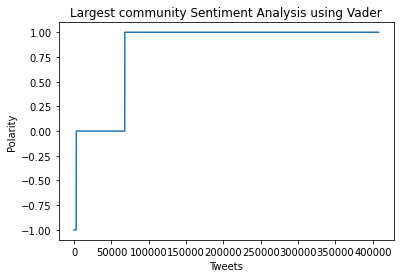

In [12]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [13]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,neg,neu,pos,compound
rounded_polarity,,,,,,,
-1,2889,2889,2889,2889,2889,2889,2889
0,64912,64912,64912,64912,64912,64912,64912
1,338764,338764,338764,338764,338764,338764,338764


In [14]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Rounded Overall Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.savefig('../dataout/sentiment/rounded_overall_sentiment.jpeg')
plt.close()

# Split data into segments

In [31]:
# sort dataframe by date
# df = df.sort_values(by=['date', 'time'])
# df

KeyError: 'date'

In [15]:
NUM_SEGMENTS = 40

In [16]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [17]:
# list of dfs
sub_dfs = list(split(df, NUM_SEGMENTS))
sub_dfs

[                      created_at                   id  \
 0      2021-05-31 23:59:42+00:00  1399515966774530048   
 1      2021-05-31 23:59:40+00:00  1399515957362450432   
 2      2021-05-31 23:59:35+00:00  1399515936093204480   
 3      2021-05-31 23:58:47+00:00  1399515734007447552   
 4      2021-05-31 23:58:44+00:00  1399515723274280960   
 ...                          ...                  ...   
 10166  2021-05-31 06:37:31+00:00  1399253690121277440   
 10167  2021-05-31 06:37:30+00:00  1399253689014001664   
 10168  2021-05-31 06:37:26+00:00  1399253671146254336   
 10169  2021-05-31 06:37:24+00:00  1399253662761766912   
 10170  2021-05-31 06:37:23+00:00  1399253657078571008   
 
                                            cleaned_tweet  neg    neu    pos  \
 0                                           good project  0.0  0.256  0.744   
 1                                   great project! reset  0.0  0.313  0.687   
 2      such a beautiful project and congratulations t...  0.0

In [18]:
sub_dfs[0]

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.0,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset,0.0,0.313,0.687,0.6588,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...,0.0,0.463,0.537,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...,0.0,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b...",0.0,0.659,0.341,0.8860,1
...,...,...,...,...,...,...,...,...
10166,2021-05-31 06:37:31+00:00,1399253690121277440,nice and big project i am participating in air...,0.0,0.741,0.259,0.4215,1
10167,2021-05-31 06:37:30+00:00,1399253689014001664,i am participating in airdrop,0.0,1.000,0.000,0.0000,0
10168,2021-05-31 06:37:26+00:00,1399253671146254336,i am participating in airdrop,0.0,1.000,0.000,0.0000,0
10169,2021-05-31 06:37:24+00:00,1399253662761766912,i am participating in airdrop,0.0,1.000,0.000,0.0000,0


# Sentiment analysis per segment

In [19]:
def get_avg_segment_sentiment(df):
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        sumsentiment += df['compound'].iloc[i]
        count += 1
    return sumsentiment / count

In [20]:
# compounds = []
# firstcol = []
# for sub_df in sub_dfs:
    
#     print(sub_df.compound.mean())
#     get_avg_segment_sentiment(sub_df)

In [21]:
compounds = []
mns, mxs = [], []
for sub_df in sub_dfs:
    compounds.append(sub_df.compound.mean())
    mxs.append(sub_df.index.max())
    mns.append(sub_df.index.min())

compound_df = pd.DataFrame(dict(
    mn=mns,
    mx=mxs,
    compouned=compounds
))

In [22]:
compound_df

,mn,mx,compouned
0,0,10170,0.544467
1,10171,20341,0.393057
2,20342,30527,0.438612
3,30528,40700,0.371522
4,40701,50871,0.569953
5,50872,61042,0.594121
6,61043,71210,0.276492
7,71211,81380,0.547441
8,81381,91553,0.555604
9,91554,101720,0.369398


In [23]:
#plot average sentiment over time
plt.plot(compound_df.index, compound_df['compouned'])
plt.title('Sentiment per segment (40 segments of ~10k)')
plt.ylabel('Average Polarity')
plt.xlabel('Segment')
plt.savefig('../dataout/sentiment/sentiment_per_segment.jpeg')
plt.close()

# Get overall average sentiment

In [30]:
avg_sentiment = df['compound'].mean()
avg_sentiment

0.5566739261864646